In [1]:
corpus = ['the woman is a wise queen',
          'the man is a wise president',
          'she is a pretty woman',
          'he is a strong man',
          'she is still young',
          'he is very old',
          'he is the current president of US',
          'the prince is a son of the king',
          'the princess is a daughter of the king',
          'a prince is a young man',
          'a princess is a young woman']

In [2]:
# q1) 주석 부분에 function1의 목적을 쓰고, 그 주된 목적에 맞게 function1의 이름 변경하기

def skip_gram(corpus):    
    sentences = []
    
    for sentence in corpus:
        # 문장을 단어단위로 짜른후 sentences에 append
        sentences.append(sentence.split())
        #sentences = [['나는','박성진','이다],['너는','정윤호','이다'],...]
        
    # 윈도우 사이즈 
    window = 2 

    data = []
    
    # 문장들을 for문으로 
    for sentence in sentences:
        # 문장에서 각단어와 인덱스 
        for idx, word in enumerate(sentence):
            
            # neighnor 은 윈도우 사이즈내에 있는 주변단어
            # data['현재중심단어','윈도우사이즈내에 있는 주변단어'] 로 이루어져 있는 이중리스트 
            for neighbor in sentence[max(idx - window, 0) : min(idx + window, len(sentence)) + 1] : 
                if neighbor != word:
                    data.append([word, neighbor])
    return data

In [3]:
import pandas as pd

data = skip_gram(corpus)
df = pd.DataFrame(data, columns = ['input', 'label'])

In [4]:
df.head(10)

,input,label
0,the,woman
1,the,is
2,woman,the
3,woman,is
4,woman,a
5,is,the
6,is,woman
7,is,a
8,is,wise
9,a,woman


In [5]:
df.shape

(194, 2)

In [6]:
# corpus 내 중복단어 제거 
def word_set(corpus):
    words = []
    for text in corpus:
        for word in text.split(' '):
            words.append(word)
    # 유니크한 단어리스트         
    words = set(words)
    return words

In [7]:
words = word_set(corpus)

In [8]:
words

{'US',
 'a',
 'current',
 'daughter',
 'he',
 'is',
 'king',
 'man',
 'of',
 'old',
 'president',
 'pretty',
 'prince',
 'princess',
 'queen',
 'she',
 'son',
 'still',
 'strong',
 'the',
 'very',
 'wise',
 'woman',
 'young'}

In [9]:
#word_dict
# word_set 에서 단어에 인덱스 붙혀주는 작업 
def word_index(words):
    d = {}
    for i,word in enumerate(words):
        d[word] = i
    return d

In [10]:
d = word_index(words)

In [11]:
import numpy as np

# 
def one_hot_encoding(word_index, ONE_HOT_DIM):
    one_hot_vector = np.zeros(ONE_HOT_DIM)
    one_hot_vector[word_index] = 1
    return one_hot_vector

In [12]:
# q6) Word2Vec을 tensorflow로 구현한 코드에서 ? 부분을 올바르게 채워넣기
# q7) 여기서 구현한 Word2Vec의 아키텍쳐는 CBOW or Skip Gram ? -> skip gram
# cross entropy 참고
# https://ratsgo.github.io/deep%20learning/2017/10/02/softmax/
# https://kevinthegrey.tistory.com/123

In [13]:
len(words)

24

In [14]:
import tensorflow as tf

ONE_HOT_DIM = len(words)

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(one_hot_encoding(d[x], ONE_HOT_DIM))
    Y.append(one_hot_encoding(d[y], ONE_HOT_DIM))


/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
# convert X,Y to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# embedding dimension
EMBEDDING_DIM = 2

# hidden layer : represent word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
output = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function : cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(output), axis=[1]))

# training
train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 10000
for i in range(iteration):
    # input : X_train which is one hot encoded word
    # label : Y_train which is one hot encoded neighbor word
    sess.run(train, feed_dict={x: X_train, y_label: Y_train})
    if i % 2000 == 0:
        print('iteration '+ str(i) +' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.8328996
iteration 2000 loss is :  2.560536
iteration 4000 loss is :  2.4639053
iteration 6000 loss is :  2.4289618
iteration 8000 loss is :  2.4117978


In [21]:
# the hidden layer (W1 + b1) -> look up table
vectors = sess.run(W1 + b1)
vectors

array([[ 0.95719546,  3.057534  ],
       [-1.1391757 ,  2.3365705 ],
       [ 2.0306094 ,  1.8200833 ],
       [ 1.0079331 ,  0.41516006],
       [ 0.24237418,  1.3553934 ],
       [ 2.079575  ,  1.4303844 ],
       [ 1.5932698 ,  1.7526128 ],
       [ 2.0213137 ,  1.7912288 ],
       [ 0.11736465,  0.6375064 ],
       [ 1.9361173 ,  1.136966  ],
       [-1.3304188 ,  1.413453  ],
       [ 1.4631437 ,  1.0147321 ],
       [ 0.34680063,  1.8141298 ],
       [ 2.6895194 ,  1.6138754 ],
       [ 1.3367637 ,  3.1264029 ],
       [ 3.29335   ,  1.207286  ],
       [-1.4644003 ,  2.596106  ],
       [ 1.0903263 ,  0.23808348],
       [-0.46365583,  1.0629398 ],
       [ 2.9716184 ,  1.1821681 ],
       [ 1.0994462 ,  0.4679401 ],
       [ 3.9091873 ,  0.1876576 ],
       [ 0.88810796,  1.4936509 ],
       [-0.5333042 ,  0.610021  ]], dtype=float32)

In [22]:
sess.close()

In [23]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,prince,0.957195,3.057534
1,man,-1.139176,2.336571
2,she,2.030609,1.820083
3,president,1.007933,0.415160
4,queen,0.242374,1.355393
5,daughter,2.079575,1.430384
6,strong,1.593270,1.752613
7,he,2.021314,1.791229
8,a,0.117365,0.637506
9,wise,1.936117,1.136966


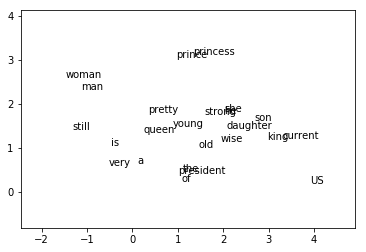

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x1_axis_min = np.amin(vectors, axis=0)[0] - PADDING
x2_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x1_axis_max = np.amax(vectors, axis=0)[0] + PADDING
x2_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x1_axis_min,x1_axis_max)
plt.ylim(x2_axis_min,x2_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()